In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc

In [2]:
workdata = pd.read_csv('./CellsData_clean.csv',index_col=0)
workdata.head()

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_28,cell_29,cell_30,cell_31,cell_33,cell_34,cell_35,cell_36,cell_37,cell_38
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import russellrao

In [4]:
def forward_Laggedcorrs(fixed_signal,datamatrix,number_of_lags,similarity_measure):
    s1 = fixed_signal

    tot_points = np.shape(datamatrix)[0]
    nsignals = np.shape(datamatrix)[1]
    Lag_Corr = np.empty((0,number_of_lags))

    for i in np.arange(0,nsignals):
        s2 = datamatrix[:,i]
        lagged_cor = [1-similarity_measure(s1[0:tot_points-i],s2[i:tot_points]) for i in np.arange(0,number_of_lags)]
        Lag_Corr = np.append(Lag_Corr,[lagged_cor],axis=0)
    return(np.transpose(Lag_Corr))    


In [5]:
matrix_wd= np.asarray(workdata)
numCols = len(workdata.columns)

Elegimos el número de lags a probar y aplicamos la función que calcula la similaridad con respecto a dichos lags:

In [6]:
numLags = 100
forward_LagSim_allsignals = [forward_Laggedcorrs(matrix_wd[:,col],
                                                 matrix_wd,
                                                 numLags,
                                                 jaccard) for col in range(0,numCols)
                            ]

# Mejores lags para una célula


Matríz de similaridad de la **célula 1** con respecto a las demás a distintos (**100**) lags:

In [7]:
pd.DataFrame(forward_LagSim_allsignals[0],
             columns=workdata.columns)

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_28,cell_29,cell_30,cell_31,cell_33,cell_34,cell_35,cell_36,cell_37,cell_38
0,1.000000,0.049020,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.061881,...,0.0,0.000000,0.040462,0.003333,0.018939,0.073903,0.0,0.019231,0.050746,0.038961
1,0.741176,0.052459,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.069825,...,0.0,0.000000,0.034483,0.003333,0.018939,0.064073,0.0,0.025806,0.053892,0.038961
2,0.549738,0.049020,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.072500,...,0.0,0.000000,0.028571,0.003333,0.018939,0.054422,0.0,0.032468,0.057057,0.032258
3,0.416268,0.042208,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.075188,...,0.0,0.000000,0.022727,0.003333,0.018939,0.049661,0.0,0.032468,0.060241,0.032258
4,0.315556,0.035484,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.078086,...,0.0,0.000000,0.016949,0.006689,0.018939,0.044944,0.0,0.032468,0.063444,0.025641
5,0.238494,0.025559,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.078283,...,0.0,0.000000,0.011236,0.006689,0.018939,0.044944,0.0,0.025806,0.066667,0.019108
6,0.184000,0.019048,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.078481,...,0.0,0.000000,0.005587,0.013468,0.018939,0.044944,0.0,0.019231,0.066667,0.012658
7,0.138462,0.015823,0.000000,0.0,0.000000,0.006369,0.0,0.000000,0.000000,0.078680,...,0.0,0.000000,0.000000,0.020339,0.018939,0.044944,0.0,0.012739,0.063444,0.006289
8,0.108614,0.012618,0.000000,0.0,0.000000,0.012821,0.0,0.000000,0.000000,0.078880,...,0.0,0.000000,0.000000,0.027304,0.018939,0.044944,0.0,0.006329,0.060241,0.000000
9,0.084249,0.009434,0.000000,0.0,0.000000,0.019355,0.0,0.000000,0.000000,0.079082,...,0.0,0.000000,0.000000,0.030822,0.022814,0.044944,0.0,0.000000,0.057057,0.000000


## Ahora definiremos una función que maximice la similaridad entre pares de células en función del lag:

In [8]:
def best_lags(ref_cell):
    ref_cell
    bestlags_cell = [np.argmax(forward_LagSim_allsignals[ref_cell][:,i]) for i in range(numCols)]
    return(bestlags_cell)

# Vector de similaridad maximizada para una célula

In [9]:
def optimize_similarity(ref_column,datamatrix):
    
    tot_points = np.shape(datamatrix)[0]
    nsignals = np.shape(datamatrix)[1]
    optimized_cell1 = []
    bestlags = best_lags(ref_column)

    for i in np.arange(0,nsignals):
            s1 = workdata.iloc[:,ref_column]
            s2 = workdata.iloc[:,i]
            lagged_cor = [1-jaccard(s1[0:tot_points-bestlags[i]],
                                    s2[bestlags[i]:tot_points])]

            optimized_cell1 = np.append(optimized_cell1,lagged_cor,axis=0)
    return(optimized_cell1)


## Aplicamos la optimización a todas las células:

,cell_1,cell_2,cell_3,cell_4,cell_5,cell_6,cell_7,cell_8,cell_9,cell_10,...,cell_28,cell_29,cell_30,cell_31,cell_33,cell_34,cell_35,cell_36,cell_37,cell_38
cell_1,1.000000,0.052459,0.025157,0.000000,0.030675,0.025974,0.000000,0.013072,0.017857,0.107895,...,0.013333,0.005682,0.040462,0.045139,0.054902,0.092199,0.000000,0.060000,0.066667,0.059603
cell_2,0.079038,1.000000,0.021739,0.080925,0.100592,0.035294,0.011561,0.000000,0.031579,0.074699,...,0.000000,0.030612,0.025000,0.116438,0.113636,0.111111,0.000000,0.033708,0.071023,0.033520
cell_3,0.044872,0.050279,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085714,0.054945,...,0.000000,0.000000,0.000000,0.050000,0.105691,0.040752,0.000000,0.000000,0.013889,0.000000
cell_4,0.051948,0.089172,0.000000,1.000000,0.360000,0.333333,0.000000,0.000000,0.000000,0.039855,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.044586,0.000000,0.000000,0.000000,0.000000
cell_5,0.050000,0.048913,0.000000,0.000000,1.000000,0.250000,0.000000,0.080000,0.048780,0.032967,...,0.200000,0.000000,0.000000,0.067901,0.052239,0.046584,0.000000,0.148148,0.009009,0.000000
cell_6,0.039474,0.033898,0.000000,0.000000,0.200000,1.000000,0.000000,0.000000,0.000000,0.021898,...,0.000000,0.000000,0.000000,0.038217,0.039683,0.018868,0.000000,0.000000,0.019048,0.100000
cell_7,0.000000,0.012987,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.007634,...,0.000000,0.000000,0.062500,0.000000,0.000000,0.006369,0.000000,0.000000,0.000000,0.000000
cell_8,0.026490,0.025478,0.466667,0.000000,0.000000,0.000000,0.000000,1.000000,0.153846,0.010526,...,0.000000,0.000000,0.000000,0.025641,0.040650,0.022293,0.000000,0.000000,0.034314,0.000000
cell_9,0.062112,0.022727,0.151515,0.000000,0.000000,0.000000,0.000000,0.153846,1.000000,0.025180,...,0.000000,0.000000,0.000000,0.047619,0.082707,0.039755,0.000000,0.062500,0.055814,0.060606
cell_10,0.088832,0.106870,0.053381,0.038732,0.045139,0.035587,0.007117,0.024911,0.027027,1.000000,...,0.014235,0.054422,0.033003,0.087719,0.077957,0.119850,0.028470,0.024561,0.097285,0.024476


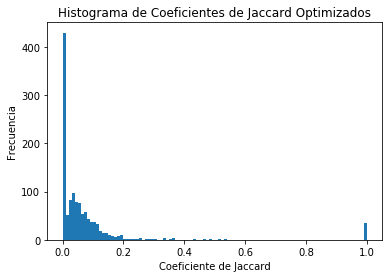

In [10]:
optimized_matrix = []
for i in range(0,numCols):
    optimized = optimize_similarity(i,workdata)
    optimized_matrix = np.append(optimized_matrix,optimized)

plt.hist(optimized_matrix,bins=100)
plt.title('Histograma de Coeficientes de Jaccard Optimizados')
plt.xlabel('Coeficiente de Jaccard')
plt.ylabel('Frecuencia')

optimized_matrix = np.reshape(optimized_matrix,(35,35))
optimized_matrix = pd.DataFrame(optimized_matrix,index=workdata.columns,columns=workdata.columns)
optimized_matrix

A

Text(0.5, 1, 'Optimized Jaccard Matrix')

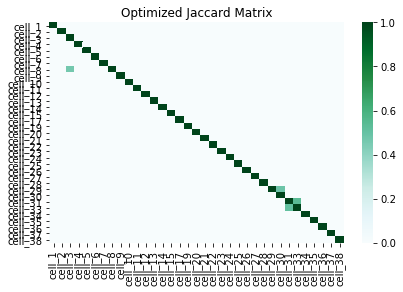

In [11]:
threshold = .45
optimized_matrix_replaced = optimized_matrix.apply(lambda x: [y if y >= threshold else 0 for y in x])

sns.heatmap(optimized_matrix_replaced,
            cmap='BuGn',
            xticklabels=workdata.columns, #Etiquetas de la gráfica
            yticklabels=workdata.columns,
             )
plt.tight_layout()
plt.title('Optimized Jaccard Matrix')

# Visualización del raster y el grafo

In [12]:
import networkx as nx

In [13]:
#Tomaremos la matríz de Jaccard (hay que convertirla a 'array' usando .values) 
graph = nx.from_numpy_matrix(optimized_matrix_replaced.values) 

# Indicamos que queremos una gráfica dirigida
#graph = graph.to_directed() 

nodes = graph.nodes()       # Nodos del grafo

#Aristas y pesos de conexión:
edges,weights = zip(*nx.get_edge_attributes(graph,'weight').items()) 
colors = np.asarray(weights)

#Posición de los nodos en la figura:
positions = nx.spring_layout(graph)

#Definimos las etiquetas de los nodos
labels1={} 
for i in range (0,len(workdata.columns)):
    labels1[i]=workdata.columns[i]

/Users/nelion/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


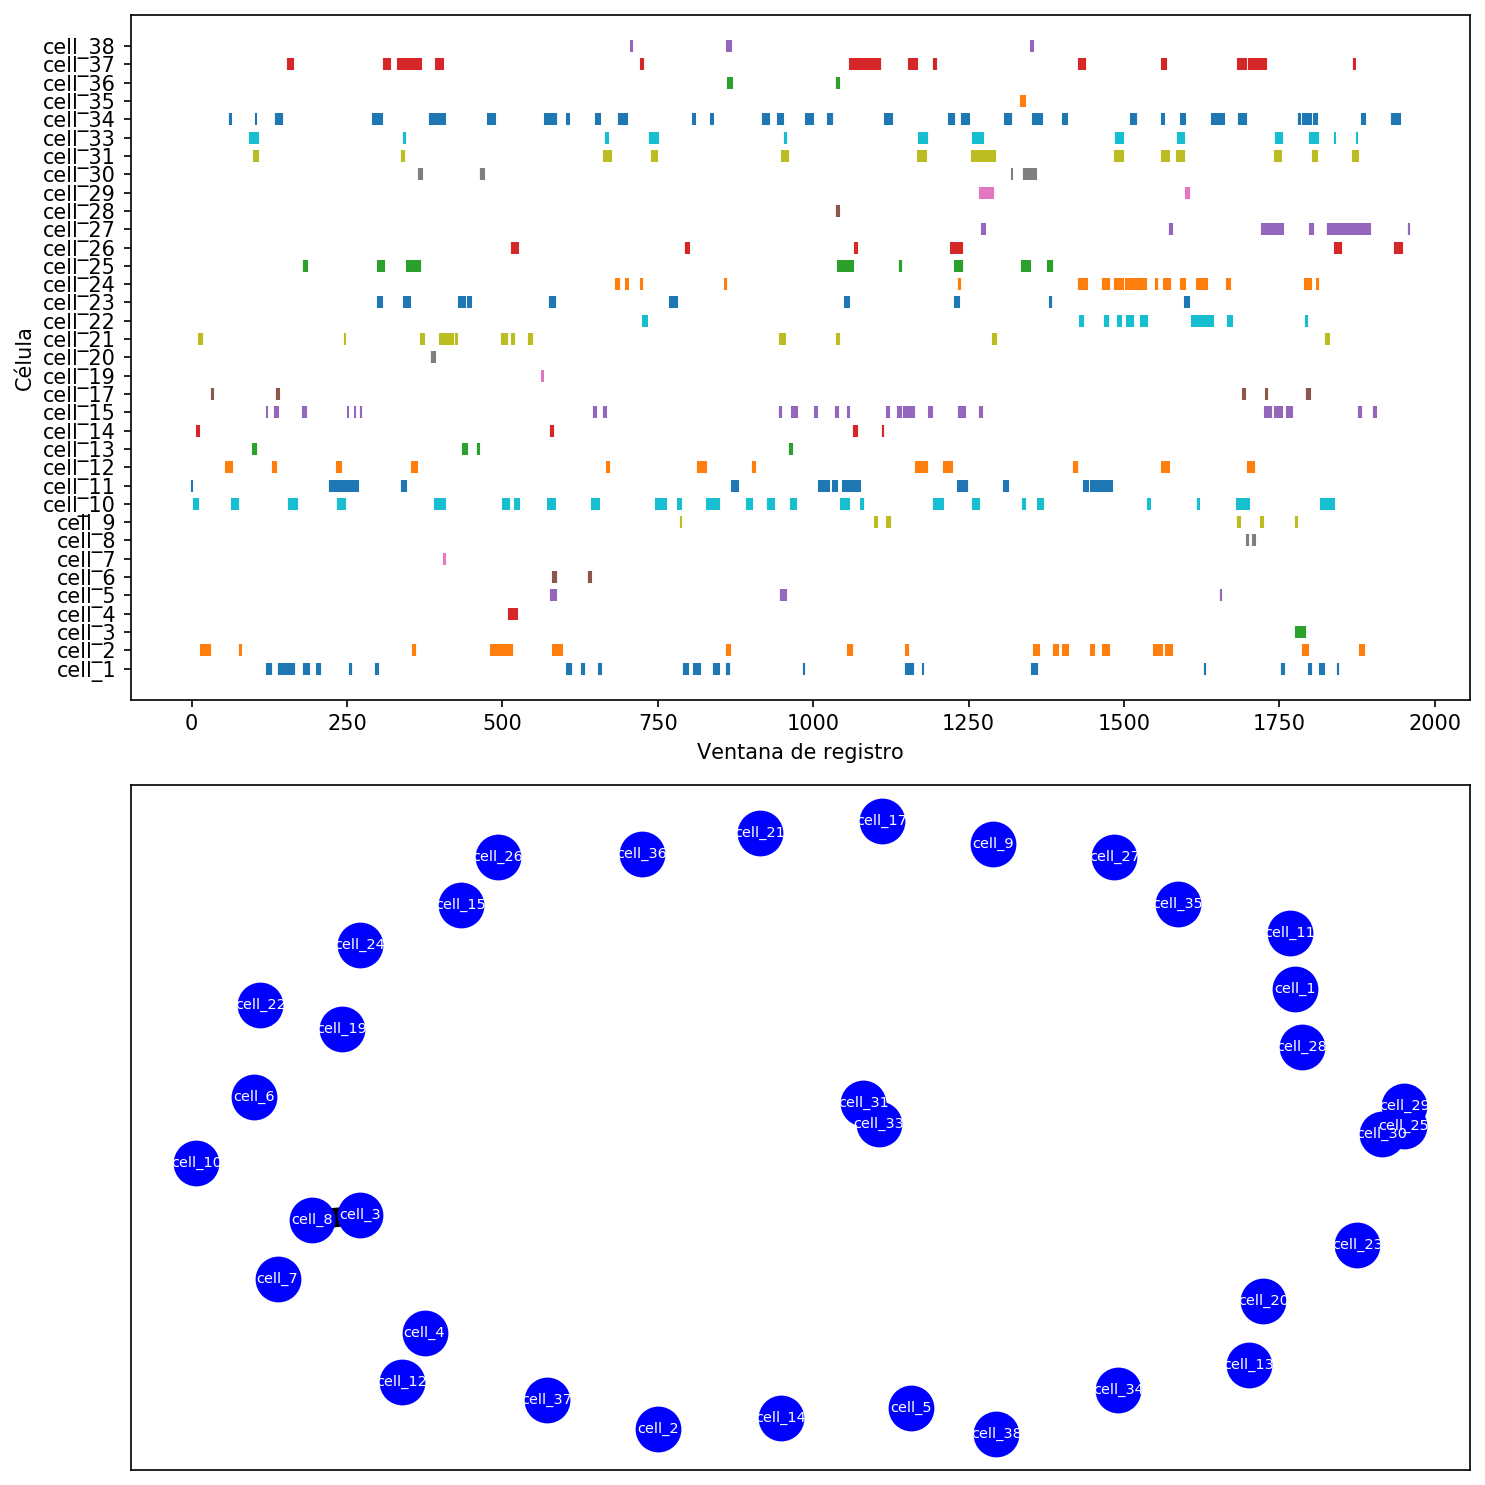

In [14]:
fig = plt.figure(figsize=(10,10),dpi=150)

############
# Red
############

plt.subplot(211)
plt.style.use('default')
#Para cada célula, traza una línea vertical cuando esta presenta un spike
for cell in range(len(workdata.columns)):
    spikeInds = sc.where(workdata.iloc[:,cell]==1)[0] #Índices del spike
    plt.plot(spikeInds, (cell)*sc.ones(len(spikeInds)),'|')

ax=plt.gca()
plt.yticks(np.arange(0, len(workdata.columns))) 
ax.set_yticklabels(workdata.columns) #Asigna la etiqueta de cada célula a la gráfica

plt.ylabel('Célula')
plt.xlabel('Ventana de registro')

plt.draw()
plt.tight_layout()


############
# Raster
############

plt.subplot(212)

#Dibujamos las etiquetas
nx.draw_networkx_labels(graph,
                        positions,
                        labels1,
                        font_size=7,
                        font_color ="white") #Color de las etiquetas
#Dibujamos las aristas
nx.draw_networkx_edges(graph, positions, alpha=1,width=colors*20)
#Dibujamos los nodos
nx.draw_networkx_nodes(graph, 
                       positions, 
                       alpha=1,
                       nodelist=nodes, 
                       node_color='blue', 
                       with_labels=False, 
                       node_size=440)

plt.grid(False)